In [375]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

W tym zadaniu skupimy się na procesie ruiny danej wzorem:
$$
X_t = u + ct - \sum_{i=0}^{N_t}\xi_i
$$

gdzie
* $t>0$ jest zmienną czasu
* $c>0$ jest stałą przyrostu (np. wielkością składki ubezpieczeniowej) 
* $u>0$ jest kapitałem zakładowym
* $N_t$ jest procesem Poissona o intensywości $\lambda$
* $\xi_i$ jest zmienną losową z rozkładu wykładniczego $Exp(\eta)$ (np. wielkość szkód, które musi pokryć ubezpieczalnia)

In [376]:
def proces_ruiny(T: int,lamb: float,eta: float,u: float,c: float) -> int:
    """
    Funkcja zwracająca wiadomość, czy firma zbankrutowała

    Parametry:
    T (int): horyzont czasowy
    lamb(float): parametr procesu Poissona
    eta (float): parametr Xi
    u (float): kapitał początkowy
    c (float): stałą przyrostu

    Zwraca:
    0 lub 1 - informację czy firma zbankrutowała (jeśli tak, to return 1)

    """
    te = [0]
    iy = [0]
    I = 0
    T_i = 0
    Xt = []
    while T_i <= T:
        t = np.random.exponential(1/lamb)
        T_i += t
        I += 1
        iy.append(I)
        if T_i > T:
            te.append(T)
            break
        te.append(T_i)
    zetas = []
    for _ in range(I):
        zetas.append(np.random.exponential(eta))
    for i in range(len(iy)):
        wart = u+c*te[i]-sum(zetas[:i])
        if i>0:
            if Xt[i-1]<0:
                Xt.append(Xt[i-1])
            else:
                Xt.append(wart)
        else:
            Xt.append(wart)
    if min(Xt)<=0:
        return 1
    if min(Xt)>0:
        return 0

Podana wyżej funkcja służy do określenia, czy przedsiębiorstwo zeszło poniżej zera ze swoim kapitałem, czyli czy zbankrutowało.

In [377]:
def pollaczek_chinczyn(u: float, c: float, eta: float, lamb: float) -> float:
    """
    Funkcja zwracająca prawdopodbieństwo ruiny ze wzoru Pollaczka_Chinczyna

    Parametry:
    lamb(float): parametr procesu Poissona
    eta (float): parametr Xi
    u (float): kapitał początkowy
    c (float): stałą przyrostu

    Zwraca:
    prawdopodobieństwo ruiny ze wzoru Pollaczka_Chinczyna

    """
    return eta*lamb/c*np.exp(-((1/eta)-(lamb/c))*u)

Powyższa funkcja jest implementacją prawdopodobieństwa ruiny w czasie nieskończonym o podanych w argumentach parametrach
$$
\psi(u, c) = \mathbb{P}(\tau < \infty)
$$
wyliczanej ze wzoru Pollaczka-Chinczyna:

$$
\psi(u,c) = \frac{\eta \lambda}{c} e^{-(\frac{1}{\eta} - \frac{\lambda}{c})^u}
$$

In [378]:
def prawdopodobienstwo_ruiny(T:int,lamb:float,eta:float,u:float,c:float,mc:int) -> float:
    """
    Funkcja zwracająca prawdopodbieństwo empiryczne ruiny

    Parametry:
    T (int): horyzont czasowy
    lamb(float): parametr procesu Poissona
    eta (float): parametr Xi
    u (float): kapitał początkowy
    c (float): stałą przyrostu
    mc (int): liczba symulacji Monte Carlo

    Zwraca:
    prawdopodobieństwo empiryczne ruiny

    """
    if_ruin = np.zeros(mc)
    for i in range(mc):
        if_ruin[i] = proces_ruiny(T,lamb,eta,u,c)
    return sum(if_ruin)/len(if_ruin)

In [399]:
symulacje = 1000
lamb = 1
eta = 1
u = 5
c = 2
czas1 = 10            
czas2 = 20
czas3 = 50

pc = pollaczek_chinczyn(u,c,eta,lamb)

est1 = prawdopodobienstwo_ruiny(czas1,lamb,eta,u,c,symulacje)
est2 = prawdopodobienstwo_ruiny(czas2,lamb,eta,u,c,symulacje)
est3 = prawdopodobienstwo_ruiny(czas3,lamb,eta,u,c,symulacje)

print(f"Wyestymowane prawdopodobieństwo ruiny dla T={czas1}: {est1}")
print(f"Wyestymowane prawdopodobieństwo ruiny dla T={czas2}: {est2}")
print(f"Wyestymowane prawdopodobieństwo ruiny dla T={czas3}: {est3}")
print(f"Prawdopodobieństwo ruiny ze wzoru Pollaczka-Chinczyna: {pc}")

Wyestymowane prawdopodobieństwo ruiny dla T=10: 0.031
Wyestymowane prawdopodobieństwo ruiny dla T=20: 0.042
Wyestymowane prawdopodobieństwo ruiny dla T=50: 0.049
Prawdopodobieństwo ruiny ze wzoru Pollaczka-Chinczyna: 0.0410424993119494


Funkcja `prawdopodobienstwo_ruiny`sprawdza nam empirycznie, ile razy przedsiębiorstwo faktycznie symulacyjnie upadło. Wzięliśmy pod lupę 3 różne horyzonty czasowe, dające nam możliwość na teoretyczne większe szanse na bankructwo przy takich samych parametrach. Widzimy jednak, że wartości są bardzo podobne, co może wskazywać, że przy podanych parametrach, jeśli firma nie upadnie na początku, z dużą dozą przekonania można twierdzić, że nie upadnie też w przyszłości. 


Wartości oscylują również w okolicach teoretycznej wartości prawdopodobieństwa ruiny wyliczanej ze wzoru Pollaczka-Chinczyna, potwierdzając zasadność jego postaci i użycia.

In [380]:

us = np.linspace(2,10,100) 
cs0 = np.linspace(2,4,5)

cs = np.linspace(1,100,100)  
us0 = np.linspace(1,10,5)

pol_c_1 =pollaczek_chinczyn(us, cs0[0], eta, lamb) 
pol_c_2 =pollaczek_chinczyn(us, cs0[1], eta, lamb) 
pol_c_3 =pollaczek_chinczyn(us, cs0[2], eta, lamb) 
pol_c_4 =pollaczek_chinczyn(us, cs0[3], eta, lamb)
pol_c_5 =pollaczek_chinczyn(us, cs0[4], eta, lamb)

pol_u_1 =pollaczek_chinczyn(us0[0], cs, eta, lamb)
pol_u_2 =pollaczek_chinczyn(us0[1], cs, eta, lamb)
pol_u_3 =pollaczek_chinczyn(us0[2], cs, eta, lamb)
pol_u_4 =pollaczek_chinczyn(us0[3], cs, eta, lamb) 
pol_u_5 =pollaczek_chinczyn(us0[4], cs, eta, lamb)

Wyliczyliśmy właśnie po 5 watości prawdopodobieństwa ruiny dla zmieniających się parametrów: najpierw zmienne wartości stałych przyrostu przy stałych wartościach kapitału początkowego dla pewnego przedziału tych kapitałów, a następnie odwrotnie- zmienne kapitały przy stałych wartościach stałych przyrostu ze wzoru Pollaczka-Chinczyna. 

Teraz zrobimy to samo dla odpowiednich symulacji, aby wyestymować wartości prawdopodbieństwa ruiny dla zmieniających się zależności parametrów.

In [381]:
symulacja_c1 = np.zeros(100)
symulacja_c2 = np.zeros(100)
symulacja_c3 = np.zeros(100)
symulacja_c4 = np.zeros(100)
symulacja_c5 = np.zeros(100)
symulacja_u1 = np.zeros(100)
symulacja_u2 = np.zeros(100)
symulacja_u3 = np.zeros(100)
symulacja_u4 = np.zeros(100)
symulacja_u5 = np.zeros(100)
for i in range(100):
    symulacja_c1[i] = prawdopodobienstwo_ruiny(30, lamb,eta, us[i], cs0[0], symulacje)
    symulacja_c2[i] = prawdopodobienstwo_ruiny(30, lamb,eta, us[i], cs0[1], symulacje)
    symulacja_c3[i] = prawdopodobienstwo_ruiny(30, lamb,eta, us[i], cs0[2], symulacje)
    symulacja_c4[i] = prawdopodobienstwo_ruiny(30, lamb,eta, us[i], cs0[3], symulacje)
    symulacja_c5[i] = prawdopodobienstwo_ruiny(30, lamb,eta, us[i], cs0[4], symulacje)
    symulacja_u1[i] = prawdopodobienstwo_ruiny(30, lamb,eta, us0[0], cs[i], symulacje)
    symulacja_u2[i] = prawdopodobienstwo_ruiny(30, lamb,eta, us0[1], cs[i], symulacje)
    symulacja_u3[i] = prawdopodobienstwo_ruiny(30, lamb,eta, us0[2], cs[i], symulacje)
    symulacja_u4[i] = prawdopodobienstwo_ruiny(30, lamb,eta, us0[3], cs[i], symulacje)
    symulacja_u5[i] = prawdopodobienstwo_ruiny(30, lamb,eta, us0[4], cs[i], symulacje)


Teraz jesteśmy gotowi zwizualizować owe wyniki na wykresach odpowiednich zależności $u → ψ(u,c_0)$ dla ustalonych $c_0$ oraz $c → ψ(u_0, c)$ dla ustalonych $u_0$

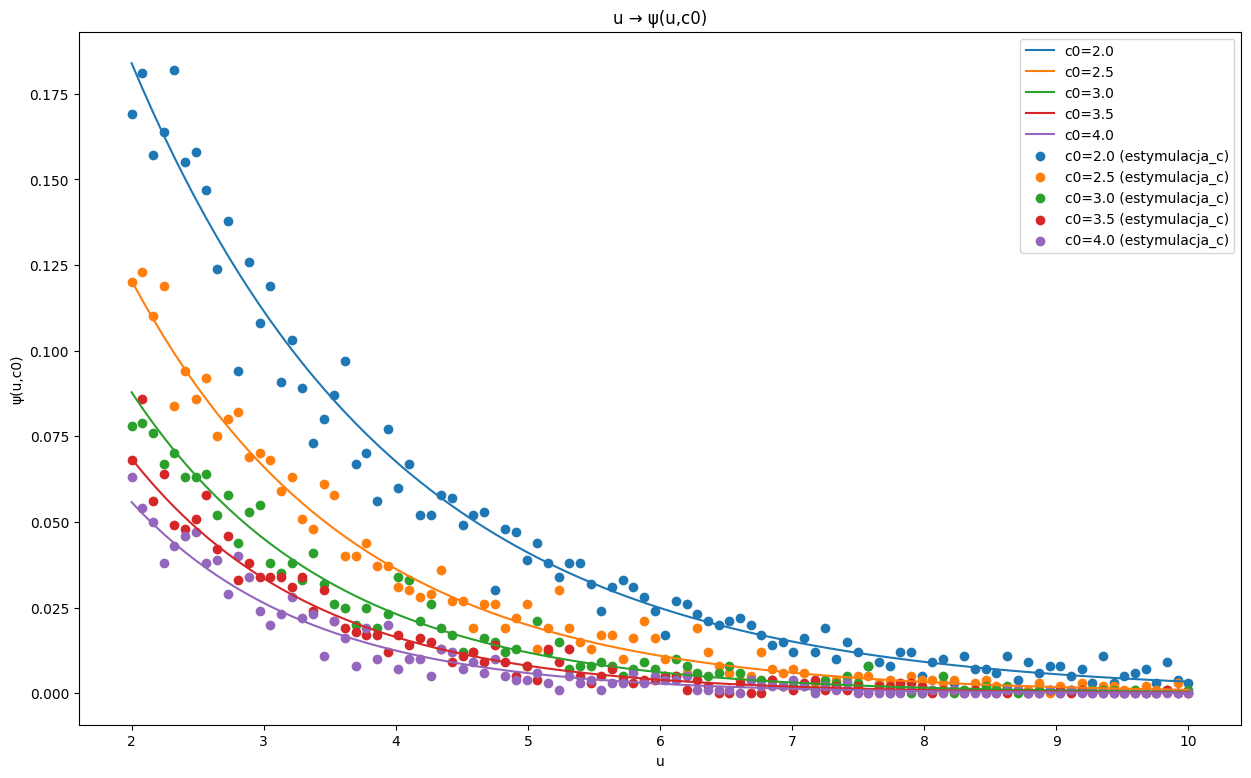

In [382]:
plt.figure(figsize=(15,9))
plt.plot(us, list(zip(pol_c_1, pol_c_2, pol_c_3, pol_c_4, pol_c_5)), label=[f"c0={cs0[0]}", f"c0={cs0[1]}", f"c0={cs0[2]}", f"c0={cs0[3]}", f"c0={cs0[4]}"])
plt.scatter(us, symulacja_c1, label= f"c0={cs0[0]} (estim)")
plt.scatter(us, symulacja_c2, label = f"c0={cs0[1]} (estim)")
plt.scatter(us, symulacja_c3, label = f"c0={cs0[2]} (estim)")
plt.scatter(us, symulacja_c4, label = f"c0={cs0[3]} (estim)")
plt.scatter(us, symulacja_c5, label = f"c0={cs0[4]} (estim)")
plt.title("u → ψ(u,c0)")
plt.xlabel("u")
plt.ylabel("ψ(u,c0)")
plt.legend()
plt.show()

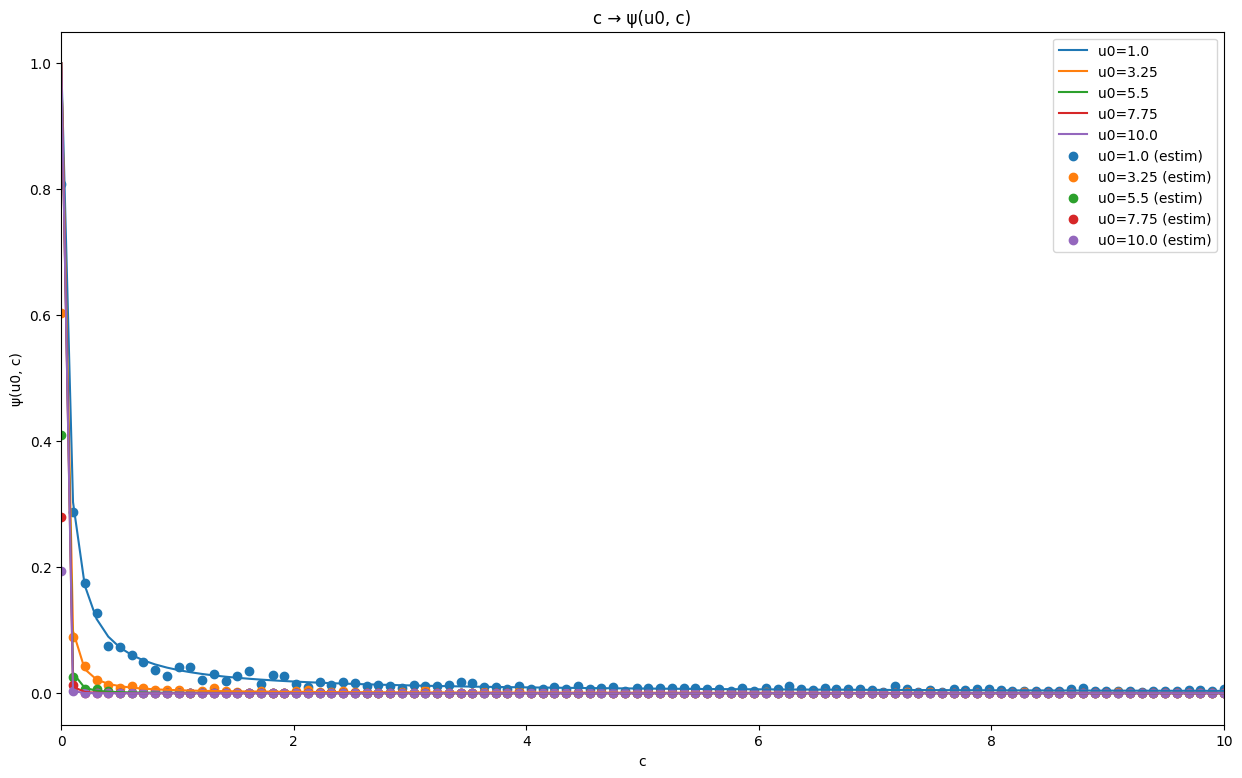

In [383]:
plt.figure(figsize=(15,9))
us = np.linspace(0,10,100)
plt.plot(us, list(zip(pol_u_1, pol_u_2, pol_u_3, pol_u_4, pol_u_5)), label=[f"u0={us0[0]} ", f"u0={us0[1]} ", f"u0={us0[2]} ", f"u0={us0[3]} ", f"u0={us0[4]} "])
plt.scatter(us, symulacja_u1, label= f"u0={us0[0]} (estim)")
plt.scatter(us, symulacja_u2, label = f"u0={us0[1]} (estim)")
plt.scatter(us, symulacja_u3, label = f"u0={us0[2]} (estim)")
plt.scatter(us, symulacja_u4, label = f"u0={us0[3]} (estim)")
plt.scatter(us, symulacja_u5, label = f"u0={us0[4]} (estim)")
plt.title("c → ψ(u0, c)")
plt.xlabel("c")
plt.ylabel("ψ(u0, c)")
plt.legend()
ax = plt.gca()
ax.set_xlim([0, 10])
plt.show()

Jak widać na obu wykresach wartości wyestymowane oscylują w okolicach wartości teoretycznych wyliczonych ze wzoru Pollaczka-Chinczyna, a więc możemy stwierdzić ponownie, że wzór ten dobrze opisuje prawdopodobieństwo ruiny w jej procesie. 

Teraz przejdziemy do analizy funkcji odwrotnej do procesu ruiny.


Wzór Pollaczka-Chinczyna możemy odpowiednio przekształcić by ją otrzymać - funkcję $c(u,\phi)$, której wzór wygląda następująco

$$
c(u, \phi) = \frac{\lambda u}{W_0(u\phi e^{\frac{u}{\eta}}/{\eta})}
$$

gdzie $W_0$ jest gałęzią funkcji Lamberta, zdefiniowaną poprzez równanie $W_0(xe^x) = x$ dla $x>0$. Ta analiza odpowiada szukaniu wymaganej wartości wpłat przy danym kapitale początkowym w celu osiągnięcia wymaganego prawdopodobieństwa ruiny. Zweryfikujemy symulacyjnie ten wynik.  

Zaimplementujemy ten wzór z wykorzystaniem funkcji `special.scipy.lambertw`.

In [384]:
def lambert_odwr(u: float, psi: float, lambd: float, eta: float) -> float:
    """
    Funkcja zwracająca funkcję odwrotną do funkcji ruiny

    Parametry:
    u (float): kapitał początkowy
    psi (float): wartość funkcji ruiny
    lamb(float): parametr procesu Poissona
    eta (float): parametr Xi

    Zwraca:
    wymagana wartość wpłat przy danym kapitale początkowym w celu osiągnięcia wymaganego prawdopodobieństwa ruiny

    """
    return lamb*u/(scipy.special.lambertw(u*psi*np.exp(u/eta)/eta)).real


Liczymy teoretyczne wartości ze wzoru.

In [385]:
psis0 = np.linspace(0.02,0.1,5)

odwr_1 =lambert_odwr(us, psis0[0], lamb, eta)
odwr_2 =lambert_odwr(us, psis0[1], lamb, eta)
odwr_3 =lambert_odwr(us, psis0[2], lamb, eta)  
odwr_4 =lambert_odwr(us, psis0[3], lamb, eta) 
odwr_5 =lambert_odwr(us, psis0[4], lamb, eta)

/var/folders/hn/gx3zxz4516s7kxrlbtw0ygmh0000gp/T/ipykernel_6895/2671827382.py:15: RuntimeWarning: invalid value encountered in divide
  return lamb*u/(scipy.special.lambertw(u*psi*np.exp(u/eta)/eta)).real


Postaramy się teraz odpowiednio wyestymować wartości przy użyciu sortowania binarnego. Algorytm pozwalający na 'wyszukanie' odpowiedniej wartości znajduje się poniżej.

In [386]:
def c_estymacja(T:int,symulacje: int,u_vector: list[float], c_test:list[float], psi:float, lambd=1, eta=1) -> list[float]:
    """
    Funkcja zwracająca listę wyestymowanych wartości c dla listy podanej w argumencie algorytmem sortującym

    Parametry:
    T (int): horyzont czasowy
    symulacje (int): liczba symulacji Monte Carlo procesu ruiny
    u_vector (list): wektor kolejnych wartości u, dla których będziemy estymować wartości c
    c_test (list): wektor wartości c, dla których będziemy estymować wartości c
    psi (float): wartość funkcji ruiny
    lambd=1 (float): parametr procesu Poissona
    eta=1 (float): parametr Xi
    Zwraca:
    c_sort (list): lista wyestymowanych wartości c dla podanego przedziału

    """
    c_sort = np.zeros(len(u_vector))
    
    for i, u in enumerate(u_vector):
        psi_min = psi_max = psi_test = 0

        c_min = c_test[0]
        c_max = c_test[-1]
        
        while c_max - c_min > 0.1: 
            pivot = (c_min + c_max) / 2  
            psi_test = prawdopodobienstwo_ruiny(T,lambd,eta,u,pivot,symulacje)
            if psi_test > psi:
                c_min = pivot 
            else:
                c_max = pivot
        
        c_sort[i] = c_max
    

    return c_sort

Wykonujemy estymację dla 5 różnych wartości funkcji prawdopodobieństwa ruiny.

In [387]:
for_c = np.linspace(1.5,10,100)
Ts=10
c_1_empir = c_estymacja(Ts,1000,us,for_c,psis0[0])
c_2_empir = c_estymacja(Ts,1000,us,for_c,psis0[1])
c_3_empir = c_estymacja(Ts,1000,us,for_c,psis0[2])
c_4_empir = c_estymacja(Ts,1000,us,for_c,psis0[3])
c_5_empir = c_estymacja(Ts,1000,us,for_c,psis0[4])


Mając oba elementy przedstawiamy je na wykresie.

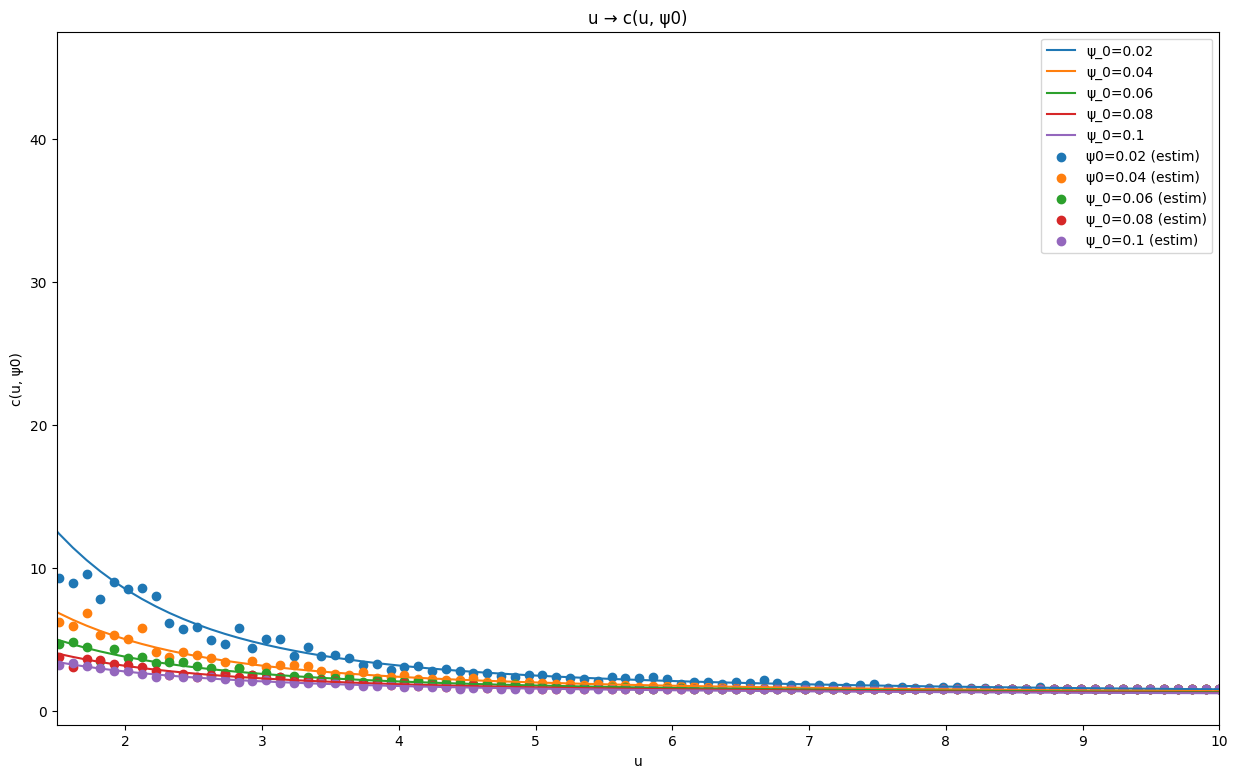

In [388]:
plt.figure(figsize=(15,9))
plt.plot(us, list(zip(odwr_1,odwr_2,odwr_3,odwr_4,odwr_5)), label=[f"ψ0={psis0[0]}", f"ψ0={psis0[1]}", f"ψ0={psis0[2]}", f"ψ0={psis0[3]}", f"ψ0={psis0[4]}"])
plt.scatter(us, c_1_empir, label= f"ψ0={psis0[0]} (estim)")
plt.scatter(us, c_2_empir, label = f"ψ0={psis0[1]} (estim)")
plt.scatter(us, c_3_empir, label = f"ψ0={psis0[2]} (estim)")
plt.scatter(us, c_4_empir, label = f"ψ0={psis0[3]} (estim)")
plt.scatter(us, c_5_empir, label = f"ψ0={psis0[4]} (estim)")
plt.title("u → c(u, ψ0)")
plt.xlabel("u")
plt.ylabel("c(u, ψ0)")
ax = plt.gca()
ax.set_xlim([1.5, 10])
plt.legend()
plt.show()

Jak widać wartości empiryczne ponownie zgadzają się z teoretycznymi. W miarę przybliżania się wartości $u$ do $1$ zauważamy wzrost sugerujący, że przy niewielkim kapitale początkowym, aby osiągnąć żądane prawdopodobieństwo ruiny należy 'nadrobić' te nikłą zaliczkę na początku odpowiednio dużymi składkami. 

Warto pamiętać o odpowiednim doborze parametrów, gdyż prawdopodobieństwo znajdujące się między $(0,1)$ może nas wrzucić na kolokwialną „minę". Jeśli  wartość iloczynu $\lambda$ oraz $\eta$ będą nie mniejsze niż wartość wpłaty oznaczać to będzie, że prawdopodobieństwo ruiny wyniesie 1, czyli firma jest skazana na pewnym przedziale czasu na bankructwo.

Przeprowadzone powyżej testy o odpowiednich parametrach mogą pomóc ludziom pracującym w biznesie ubezpieczeniowym szacować, jaką strategię powinni przyjąć, aby do ruiny omawianej od samego początku nie dopuścić.